In [1]:
# import pandas
import pandas as pd

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

In [5]:
# import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

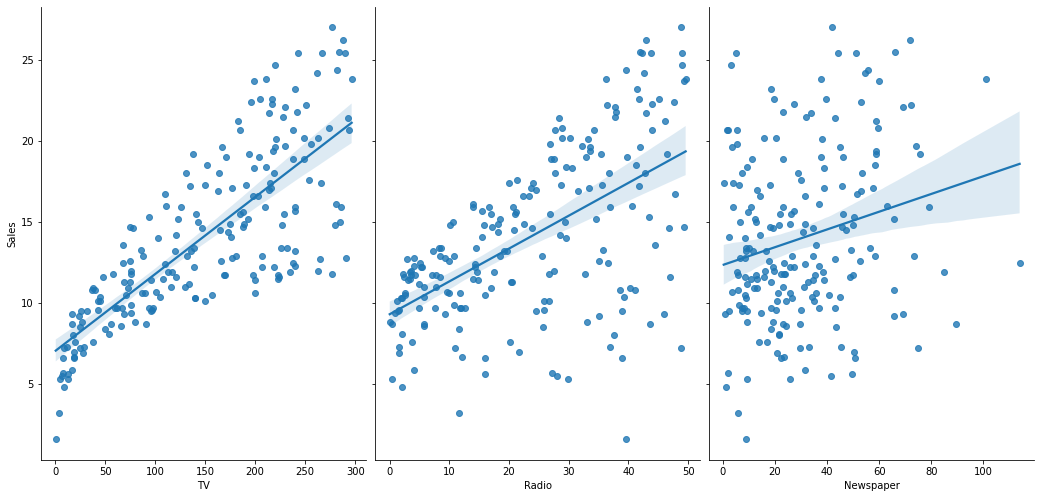

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


# Splitting X and y into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Linear regression in scikit-learn

In [13]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

# Interpreting model coefficients

In [14]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [15]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

In [16]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# Model evaluation metrics for regression

# Computing the RMSE for our Sales predictions

In [19]:
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


# Feature selection

In [20]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888
